In [1]:
# Standard useful data processing imports
import random
import numpy as np
import pandas as pd
# Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
# Scikit learn for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Keras Imports - CNN
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.
c:\users\chandana\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\chandana\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\chandana\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\chandana\anaconda3\envs\myenv

In [2]:
import cv2

In [3]:
import os
os.chdir("C:\\Users\\Chandana\\Documents\\Assignments\\Deep Learning\\Data")

In [4]:
#Set path from where files to be imported
import glob
files=glob.glob("C:\\Users\\Chandana\\Documents\\Assignments\\Deep Learning\\Data\\**\\*.png",recursive=True)

In [5]:
len(files)

78200

In [6]:
files

['C:\\Users\\Chandana\\Documents\\Assignments\\Deep Learning\\Data\\Train\\character_10_yna\\10542.png',
 'C:\\Users\\Chandana\\Documents\\Assignments\\Deep Learning\\Data\\Train\\character_10_yna\\10543.png',
 'C:\\Users\\Chandana\\Documents\\Assignments\\Deep Learning\\Data\\Train\\character_10_yna\\10545.png',
 'C:\\Users\\Chandana\\Documents\\Assignments\\Deep Learning\\Data\\Train\\character_10_yna\\10546.png',
 'C:\\Users\\Chandana\\Documents\\Assignments\\Deep Learning\\Data\\Train\\character_10_yna\\10547.png',
 'C:\\Users\\Chandana\\Documents\\Assignments\\Deep Learning\\Data\\Train\\character_10_yna\\10548.png',
 'C:\\Users\\Chandana\\Documents\\Assignments\\Deep Learning\\Data\\Train\\character_10_yna\\10549.png',
 'C:\\Users\\Chandana\\Documents\\Assignments\\Deep Learning\\Data\\Train\\character_10_yna\\10550.png',
 'C:\\Users\\Chandana\\Documents\\Assignments\\Deep Learning\\Data\\Train\\character_10_yna\\10552.png',
 'C:\\Users\\Chandana\\Documents\\Assignments\\Deep Lea

In [7]:
#Import multiple images, resize and extract pixel intensties of images
pixels=[]
for i in files:
    pix=cv2.resize(cv2.cvtColor(cv2.imread(i),cv2.COLOR_BGR2GRAY),(32,32),cv2.INTER_LINEAR).reshape(32*32)
    pixels.append(pix)

In [8]:
#Convert into data frame
import pandas as pd
import numpy as np
pixels=pd.DataFrame(np.array(pixels))

In [9]:
pixels.shape

(78200, 1024)

In [10]:
pixels.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#Get class labels
files[7000]

'C:\\Users\\Chandana\\Documents\\Assignments\\Deep Learning\\Data\\Train\\character_14_dhaa\\19712.png'

In [12]:
files[7000].split("\\")[8]

'character_14_dhaa'

In [13]:
labels=[]
for i in files:
    labels.append(i.split("\\")[8])
labels

['character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_10_yna',
 'character_1

In [14]:
pixels['labels']=labels

In [15]:
pixels.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_10_yna
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_10_yna
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_10_yna
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_10_yna
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_10_yna


In [16]:
pixels.to_csv('Data.csv', sep=',',index=False, encoding='utf-8')

In [17]:
dg = pd.read_csv('Data.csv')

In [18]:
dg.head(7000)

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_10_yna
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_10_yna
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_10_yna
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_10_yna
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_10_yna
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_14_dhaa
6996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_14_dhaa
6997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_14_dhaa
6998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_14_dhaa


In [19]:
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78200 entries, 0 to 78199
Columns: 1025 entries, 0 to labels
dtypes: int64(1024), object(1)
memory usage: 611.5+ MB


In [20]:
pixels .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78200 entries, 0 to 78199
Columns: 1025 entries, 0 to labels
dtypes: object(1), uint8(1024)
memory usage: 77.0+ MB


In [21]:
pixels.shape

(78200, 1025)

In [22]:
dg.shape

(78200, 1025)

In [23]:
dg.head(n=6)

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_10_yna
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_10_yna
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_10_yna
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_10_yna
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_10_yna
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_10_yna


In [24]:
dg.groupby("labels").count()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
labels,,,,,,,,,,,,,,,,,,,,,
character_10_yna,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700,...,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700
character_11_taamatar,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700,...,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700
character_12_thaa,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700,...,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700
character_13_daa,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700,...,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700
character_14_dhaa,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700,...,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700
character_15_adna,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700,...,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700
character_16_tabala,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700,...,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700
character_17_tha,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700,...,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700
character_18_da,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700,...,1700,1700,1700,1700,1700,1700,1700,1700,1700,1700


In [25]:
dg['labels'].unique()

array(['character_10_yna', 'character_11_taamatar', 'character_12_thaa',
       'character_13_daa', 'character_14_dhaa', 'character_15_adna',
       'character_16_tabala', 'character_17_tha', 'character_18_da',
       'character_19_dha', 'character_1_ka', 'character_20_na',
       'character_21_pa', 'character_22_pha', 'character_23_ba',
       'character_24_bha', 'character_25_ma', 'character_26_yaw',
       'character_27_ra', 'character_28_la', 'character_29_waw',
       'character_2_kha', 'character_30_motosaw',
       'character_31_petchiryakha', 'character_32_patalosaw',
       'character_33_ha', 'character_34_chhya', 'character_35_tra',
       'character_36_gya', 'character_3_ga', 'character_4_gha',
       'character_5_kna', 'character_6_cha', 'character_7_chha',
       'character_8_ja', 'character_9_jha', 'digit_0', 'digit_1',
       'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7',
       'digit_8', 'digit_9'], dtype=object)

There is no class imbalance in the dataset

### Let us visualize all the letters and numbers in  Devanagri.

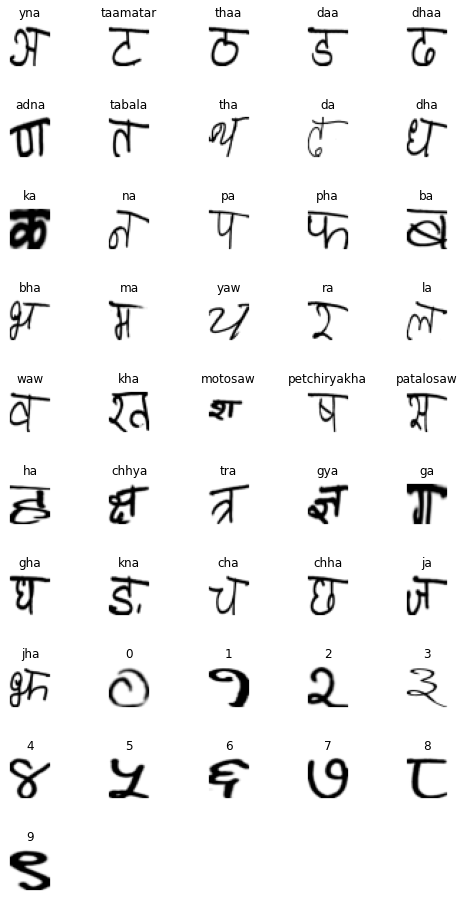

In [26]:
char_names = dg.labels.unique()  
rows =10;columns=5;
fig, ax = plt.subplots(rows,columns, figsize=(8,16))
for row in range(rows):
    for col in range(columns):
        ax[row,col].set_axis_off()
        if columns*row+col < len(char_names):
            x = dg[dg.labels==char_names[columns*row+col]].iloc[0,:-1].values.reshape(32,32)
            x = x.astype("float64")
            x/=255
            ax[row,col].imshow(x, cmap="binary")
            ax[row,col].set_title(char_names[columns*row+col].split("_")[-1])

            
plt.subplots_adjust(wspace=1, hspace=1)   
plt.show()

In [27]:
#char_names = dg.labels.unique()  
char_names

array(['character_10_yna', 'character_11_taamatar', 'character_12_thaa',
       'character_13_daa', 'character_14_dhaa', 'character_15_adna',
       'character_16_tabala', 'character_17_tha', 'character_18_da',
       'character_19_dha', 'character_1_ka', 'character_20_na',
       'character_21_pa', 'character_22_pha', 'character_23_ba',
       'character_24_bha', 'character_25_ma', 'character_26_yaw',
       'character_27_ra', 'character_28_la', 'character_29_waw',
       'character_2_kha', 'character_30_motosaw',
       'character_31_petchiryakha', 'character_32_patalosaw',
       'character_33_ha', 'character_34_chhya', 'character_35_tra',
       'character_36_gya', 'character_3_ga', 'character_4_gha',
       'character_5_kna', 'character_6_cha', 'character_7_chha',
       'character_8_ja', 'character_9_jha', 'digit_0', 'digit_1',
       'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7',
       'digit_8', 'digit_9'], dtype=object)

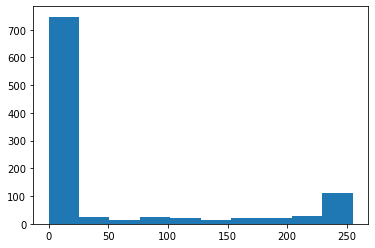

In [28]:
#Verifying the pixel distribution of any random character
import matplotlib.pyplot as plt
plt.hist(dg.iloc[0,:-1])
plt.show()


#### Let us normalize all the pixel values and set the labels column to target variable

In [29]:
X = dg.values[:,:-1]/255.0
Y = dg["labels"].values

In [30]:
X

array([[0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       ...,
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0]], dtype=object)

In [31]:
Y

array(['character_10_yna', 'character_10_yna', 'character_10_yna', ...,
       'digit_9', 'digit_9', 'digit_9'], dtype=object)

In [32]:
#Let us minimize the memory consumption
del dg
n_classes = 46

Information from the visualization

Further preprocessing steps required

In [33]:
# Standard useful data processing imports
import random
import numpy as np
import pandas as pd
# Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
# Scikit learn for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Keras Imports - CNN
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [34]:
# Let's split the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

# Encode the categories
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

In [35]:
img_height_rows = 32
img_width_cols = 32

In [36]:
im_shape = (img_height_rows, img_width_cols, 1)
x_train = x_train.reshape(x_train.shape[0], *im_shape) # Python TIP :the * operator unpacks the tuple
x_test = x_test.reshape(x_test.shape[0], *im_shape)

In [37]:
x_train.shape


(54740, 32, 32, 1)

In [38]:
x_test.shape

(23460, 32, 32, 1)

In [39]:
y_train.shape

(54740, 46)

In [40]:

y_test.shape

(23460, 46)

In [ ]:
#CNN Model - Sequential Modelling

In [41]:
cnn = Sequential()

In [42]:
kernelSize = (3, 3)
ip_activation = 'relu'
ip_conv_0 = Conv2D(filters=32, kernel_size=kernelSize, input_shape=im_shape, activation=ip_activation)
cnn.add(ip_conv_0)

In [43]:
# Add the next Convolutional+Activation layer
ip_conv_0_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_0_1)

# Add the Pooling layer
pool_0 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
cnn.add(pool_0)

In [44]:
ip_conv_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_1)
ip_conv_1_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_1_1)

pool_1 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
cnn.add(pool_1)

In [45]:

# Let's deactivate around 20% of neurons randomly for training
drop_layer_0 = Dropout(0.2)
cnn.add(drop_layer_0)

In [46]:
flat_layer_0 = Flatten()
cnn.add(Flatten())

In [47]:
# Now add the Dense layers
h_dense_0 = Dense(units=128, activation=ip_activation, kernel_initializer='uniform')
cnn.add(h_dense_0)
# Let's add one more before proceeding to the output layer
h_dense_1 = Dense(units=64, activation=ip_activation, kernel_initializer='uniform')
cnn.add(h_dense_1)

In [48]:
op_activation = 'softmax'
output_layer = Dense(units=n_classes, activation=op_activation, kernel_initializer='uniform')
cnn.add(output_layer)

In [49]:

opt = 'adam'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
# Compile the classifier using the configuration we want
cnn.compile(optimizer=opt, loss=loss, metrics=metrics)

In [50]:

print(cnn.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)         

In [51]:

history = cnn.fit(x_train, y_train,
                  batch_size=32, epochs=10,
                  validation_data=(x_test, y_test))

Train on 54740 samples, validate on 23460 samples
Epoch 1/10
54740/54740 [==============================] - 219s 4ms/step - loss: 0.7284 - accuracy: 0.7861 - val_loss: 0.2165 - val_accuracy: 0.9368
Epoch 2/10
54740/54740 [==============================] - 212s 4ms/step - loss: 0.2016 - accuracy: 0.9357 - val_loss: 0.1347 - val_accuracy: 0.9607
Epoch 3/10
54740/54740 [==============================] - 210s 4ms/step - loss: 0.1323 - accuracy: 0.9576 - val_loss: 0.1134 - val_accuracy: 0.9661
Epoch 4/10
54740/54740 [==============================] - 211s 4ms/step - loss: 0.0983 - accuracy: 0.9690 - val_loss: 0.1124 - val_accuracy: 0.9667
Epoch 5/10
54740/54740 [==============================] - 228s 4ms/step - loss: 0.0790 - accuracy: 0.9749 - val_loss: 0.1029 - val_accuracy: 0.9705
Epoch 6/10
54740/54740 [==============================] - 237s 4ms/step - loss: 0.0640 - accuracy: 0.9792 - val_loss: 0.0875 - val_accuracy: 0.9750
Epoch 7/10
54740/54740 [==============================] - 226s

In [52]:

scores = cnn.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 97.78%


In [53]:
scores = cnn.evaluate(x_train, y_train, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 99.44%


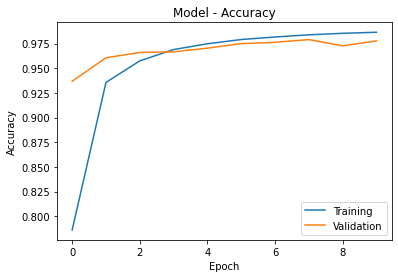

In [54]:
# Accuracy
print(history)
fig1, ax_acc = plt.subplots()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model - Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

#### According to the accuracy curves, the training and validation curves clearly follow the same trend throughout. This is not a case of overfitting or underfitting. 

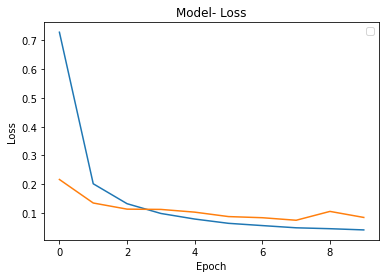

In [55]:
# Loss
fig2, ax_loss = plt.subplots()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model- Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [56]:
 print(cnn.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)         

In [57]:
cnn.save('Devanagiri model1.h5')

In [ ]:
#x_test = x_test.as_matrix()
x_test = np.reshape(x_test, (x_test.shape[0], 32, 32, 1))
cnn.evaluate( y_test)

In [ ]:
x_test.shape

In [ ]:
pred = cnn.predict(x_test, verbose = 1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1),np.argmax(pred, axis=1), target_names=[c.split("_")[-1] for c in le.classes_],digits=4))

In [ ]:
predictimage = np.reshape(x_test[100], (1, 32,32, 1))

In [ ]:
x_test.shape

In [ ]:
print(predictimage.shape)
plt.imshow(x_test[100].reshape((32,32)), cmap = 'gray')

In [ ]:
pred_class = list(cnn.predict(predictimage)[0]).index(max(cnn.predict(predictimage)[0]))

In [ ]:
print(pred_class)

#### Question:
You now will need to build an image classifier. Use a CNN architecture to build an image classifier. Use the train data to get a model. Then use the test_X.csv to make predictions. This file contains, flattened images of devnagri characters. The images in test_X.csv are of same dimensions as images in train folder, hence when you will reshape these images, you will get images with same dimensions as the ones you used to train the model. You need to make predictions on the test_X.csv. Make sure that your predictions are in the same format as given in the file submission_format.xlsx. Essentially you need to predict the class of each image in test data. Make sure the labels are spelt the same way as they are in the train data or as suggested by submission_format.xlsx (names of sub-folders in train data).

In [ ]:
import pandas as pd

In [58]:
x_test=pd.read_csv("test_X.csv")

In [59]:
x_test=np.array(x_test).reshape(x_test.shape[0],32,32,1)

In [60]:
x_test.shape

(13800, 32, 32, 1)

In [61]:
pred = cnn.predict(x_test, verbose = 1)

13800/13800 [==============================] - 11s 784us/step


In [62]:
print(pred)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [63]:
predictimage = np.reshape(x_test[100], (1, 32,32, 1))

(1, 32, 32, 1)


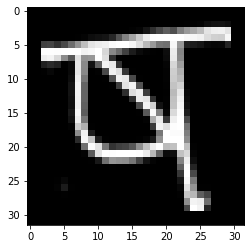

In [64]:
print(predictimage.shape)
plt.imshow(x_test[100].reshape((32,32)), cmap = 'gray')

(1, 32, 32, 1)


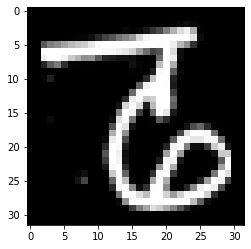

In [65]:
print(predictimage.shape)
plt.imshow(x_test[85].reshape((32,32)), cmap = 'gray')

In [66]:
pred_class = list(cnn.predict(predictimage)[0]).index(max(cnn.predict(predictimage)[0]))

In [67]:
print(pred_class)

23


(1, 32, 32, 1)


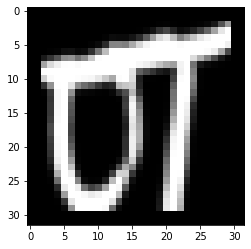

In [68]:
print(predictimage.shape)
plt.imshow(x_test[23].reshape((32,32)), cmap = 'gray')

In [82]:
y_pred=[]
for i in range(len(pred)):
    y_pred.append(np.argmax(pred[i]))
print(y_pred)


[1, 19, 36, 7, 29, 34, 42, 10, 16, 41, 13, 21, 40, 5, 27, 11, 12, 3, 14, 13, 5, 22, 33, 5, 43, 29, 12, 25, 2, 36, 7, 11, 10, 23, 0, 17, 3, 29, 13, 16, 3, 41, 42, 9, 30, 30, 18, 22, 13, 42, 11, 6, 14, 35, 0, 13, 2, 15, 26, 14, 34, 18, 0, 39, 12, 13, 34, 5, 0, 11, 22, 4, 2, 0, 41, 0, 24, 28, 9, 6, 34, 13, 5, 42, 19, 4, 15, 37, 6, 42, 2, 15, 26, 26, 7, 20, 12, 21, 31, 18, 23, 5, 29, 5, 12, 18, 0, 3, 45, 16, 24, 45, 1, 41, 28, 10, 16, 42, 0, 44, 33, 42, 13, 25, 33, 24, 7, 25, 12, 6, 22, 7, 8, 23, 30, 26, 11, 12, 1, 22, 4, 32, 17, 15, 14, 10, 17, 11, 27, 14, 34, 30, 3, 25, 23, 0, 36, 16, 5, 30, 44, 4, 13, 15, 2, 23, 35, 40, 10, 44, 20, 16, 43, 11, 1, 21, 12, 11, 26, 14, 5, 29, 14, 44, 36, 44, 21, 2, 8, 40, 45, 5, 6, 24, 11, 19, 4, 24, 27, 36, 1, 40, 32, 39, 21, 9, 17, 16, 38, 30, 42, 5, 14, 5, 26, 6, 31, 6, 41, 18, 16, 44, 2, 32, 4, 36, 29, 26, 4, 23, 40, 16, 1, 43, 40, 39, 35, 40, 44, 20, 4, 10, 34, 43, 11, 14, 31, 7, 5, 42, 11, 15, 36, 25, 32, 42, 27, 14, 19, 0, 41, 13, 13, 19, 30, 15, 44

In [109]:
#plots(test_imgs, titles=y_pred)

ctr=0
for i in range(len(y_pred)):
    if y_pred[i] == (y_test[i].any()):
        ctr=ctr+1
res = ctr/len(y_pred)*100
print(res)

2.0942028985507246


In [110]:
resultdf=(le.inverse_transform(y_pred))

In [111]:
df = pd.DataFrame(resultdf) 
  
# saving the dataframe 
df.to_csv("predicted classes.csv") 
